# Importes

In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import slate3k as slate
import nltk
from lxml import etree
from urllib.request import urlopen

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/p1ntsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Funções e classes

In [3]:
class RequestBeautifulSoup:
    def __init__(self,url):
        self.url = url
        self.intervalos = None
        self.perguntas = None
        self.respostas = None
    
    # Request do soup da biblioteza BeautifulSoup
    def requestSoup(self):
        response = get(self.url)
        return BeautifulSoup(response.text, 'html.parser')
    
    # Intervalos de onde estão as respostas
    def getIntervalos(self,listaPrincipal):
        intervalos = []
        for i in range(len(self.perguntas[1])):
            if(i != len(self.perguntas[1])-1):
                intervalos.append((self.perguntas[1][i]+1,self.perguntas[1][i+1]))
            else:
                intervalos.append((self.perguntas[1][i]+1,len(listaPrincipal)))
        self.intervalos = intervalos

    # Perguntas e suas posições
    def getPerguntas(self,soup, chaves = None):
        perguntas = []
        posi = []
        for i in range(len(soup)):
            if("?" in soup[i].text):
                if(chaves is not None):
                    texto = soup[i].text
                    for j in chaves:
                        texto = texto.replace(j,"")
                    perguntas.append(texto)
                    posi.append(i)
                else:
                    perguntas.append(soup[i].text)
                    posi.append(i)

        self.perguntas = [perguntas,posi]
    
    # Respostas
    def getRespostas(self,soup,chaves = None,subs = ""):
        respostas = []
        for i in self.intervalos:
            text = ""
            for j in range(i[0],i[1]):
                text += soup[j].text
            if(chaves is not None):
                for j in chaves:
                    text = text.replace(j,subs)
                respostas.append(text)
            else:
                respostas.append(text)
        self.respostas = respostas
        
    def getComparacao(self,first,second):
        if(len(first) == len(second)):
            return True
        else:
            return False
        
    def criarDataframePDF(self,perguntas,respostas,salve = None):
        if(salve is not None):    
            pd.DataFrame({"Perguntas" : perguntas, "Respostas" : respostas}).to_csv('./' + salve + '.csv', index= False)
        else:
            return pd.DataFrame({"Perguntas" : perguntas, "Respostas" : respostas})
    

In [4]:


def getXpathWay(url):
    response = urlopen(url)
    htmlparser = etree.HTMLParser()
    return etree.parse(response, htmlparser)
        

def getPerguntasXpath(soup, chaves = None):
    perguntas = []
    posi = []
    for i in range(len(soup)):
        if("?" in soup[i]):
            if(chaves is not None):
                texto = soup[i]
                for j in chaves:
                    texto = texto.replace(j,"")
                perguntas.append(texto)
                posi.append(i)
            else:
                perguntas.append(soup[i])
                posi.append(i)
                
    return [perguntas,posi]
                
def getPerguntasPDF(soup, chaves = None):
    perguntas = []
    posi = []
    for i in range(len(soup)):
        if("?" in soup[i]):
            if(chaves is not None):
                texto = soup[i]
                for j in chaves:
                    texto = texto.replace(j,"")
                perguntas.append(texto)
                posi.append(i)
            else:
                perguntas.append(soup[i])
                posi.append(i)
    return [perguntas,posi]

def getRespostasPDF(soup,intervalos,chaves = None):
    respostas = []
    for i in intervalos:
        text = ""
        for j in range(i[0],i[1]):
            text += soup[j]
        for k in chaves:
            text = text.replace(k,"")
        respostas.append(text)
    return respostas

# Intervalos de onde estão as respostas
def getIntervalos(posicoes,listaPrincipal):
    intervalos = []
    for i in range(len(posicoes)):
        if(i != len(posicoes)-1):
            intervalos.append((posicoes[i]+1,posicoes[i+1]))
        else:
            intervalos.append((posicoes[i]+1,len(listaPrincipal)))
    return intervalos

def criarDataframePDF(perguntas,respostas,salve = None):
    if(salve is not None):    
        pd.DataFrame({"Perguntas" : perguntas, "Respostas" : respostas}).to_csv('./' + salve + '.csv', index= False)
    else:
        return pd.DataFrame({"Perguntas" : perguntas, "Respostas" : respostas})

# Código

In [110]:
with open('./PR.html','r') as f:
    objeto_soup_1 = BeautifulSoup(f, 'html.parser')

In [133]:
objeto_soup = RequestBeautifulSoup('https://www.unimed.coop.br/viver-bem/saude-em-pauta/coronavirus-e-covid-19-perguntas-e-respostas')
soup = objeto_soup.requestSoup()

<!DOCTYPE html>

<html class="aui ltr" dir="ltr" lang="pt-BR">
<head>
<!-- Google Tag Manager -->
<script>
		(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
		new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
		j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
		'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
		})(window,document,'script','dataLayer','GTM-N8HNBSS');
	</script>
<!-- End Google Tag Manager -->
<title>Coronavírus e COVID-19: perguntas e respostas - Saúde em Pauta - Institucional</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content=" Coronavírus e COVID-19: perguntas e..." lang="pt-BR" name="description"/>
<meta content="gripe,coronavirus,covid-19,epidemia,tratamento,matéria fixa" lang="pt-BR" name="keywords"/>
<link href="https://www.unimed.coop.br/institucional-theme/images/favicon.ico" rel="Shortcut Icon"/>
<link class="lfr-css-file" href="http
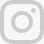

In [134]:
soup

In [147]:
div_soup = soup.find('div', class_= "journal-content-article")
# list_soup = div_soup.find_all(['p','ul','il','a','h2','h3','h4'])
list_soup = div_soup.find_all(['div','h4'])

In [150]:
list_soup[15:]

[<h4><span style="color:#86729C;">1.<span style="white-space:pre"> </span>O que é o coronavírus?</span></h4>,
 <div>
                      Segundo a Organização Mundial da Saúde (OMS), coronavírus é uma família de vírus que pode causar doenças em animais ou humanos. Em humanos, esses vírus provocam infecções respiratórias que podem ser desde um resfriado comum até doenças mais severas como a Síndrome Respiratória do Oriente Médio (MERS) e a Síndrome Respiratória Aguda Grave (SARS). O novo coronavírus causa a doença chamada COVID-19. 
                    </div>,
 <div>
                        
                    </div>,
 <h4><span style="color:#86729C;">2.<span style="white-space:pre"> </span>O que é COVID-19?</span></h4>,
 <div>
                      COVID-19 é a doença infecciosa causada pelo mais recente coronavírus descoberto. O vírus e a doença eram desconhecidos antes do surto iniciado em Wuhan, na China, em dezembro de 2019. Como nunca tivemos contato com o vírus antes, não temo

In [151]:
list_soup = list_soup[15:]

In [155]:
objeto_soup.getPerguntas(list_soup,['\xa0','\n'])
objeto_soup.getIntervalos(list_soup)
objeto_soup.getRespostas(list_soup,['\xa0','\n'])

In [156]:
print(objeto_soup.perguntas[0])
print(objeto_soup.respostas)
print(objeto_soup.getComparacao(objeto_soup.perguntas[0],objeto_soup.respostas))

['1. O que é o coronavírus?', '2. O que é COVID-19?', '3. Quais são os sintomas da COVID-19?', '4. Quão grave é a COVID-19?', '5. Como a COVID-19 é transmitida?', '6. Pessoas sem sintomas podem transmitir o coronavírus?', '7. Posso pegar a COVID-19 se tiver contato com fezes de alguém com a doença?O risco de pegar COVID-19 nas fezes de uma pessoa infectada parece ser baixo. Embora as investigações iniciais sugiram que o vírus possa estar presente nas fezes em alguns casos, a disseminação por essa via não é uma característica principal do surto. Como isso é um risco, no entanto, é outro motivo para limpar as mãos regularmente, depois de usar o banheiro e antes de comer.', '7. Posso pegar a COVID-19 se tiver contato com fezes de alguém com a doença?', '8. Posso pegar o coronavírus comendo alimentos preparados por outras pessoas?Os coronavírus foram detectados nas fezes de certos pacientes, portanto, atualmente não podemos descartar a possibilidade de transmissão ocasional de manipuladore

In [157]:
for i in objeto_soup.respostas:
    if(i != ''):
        print(i,'\n')

                     Segundo a Organização Mundial da Saúde (OMS), coronavírus é uma família de vírus que pode causar doenças em animais ou humanos. Em humanos, esses vírus provocam infecções respiratórias que podem ser desde um resfriado comum até doenças mais severas como a Síndrome Respiratória do Oriente Médio (MERS) e a Síndrome Respiratória Aguda Grave (SARS). O novo coronavírus causa a doença chamada COVID-19.                                                              

                     COVID-19 é a doença infecciosa causada pelo mais recente coronavírus descoberto. O vírus e a doença eram desconhecidos antes do surto iniciado em Wuhan, na China, em dezembro de 2019. Como nunca tivemos contato com o vírus antes, não temos imunidade contra ele.                                                              

Os sintomas mais comuns da COVID-19 são febre, tosse seca e cansaço. Outros sintomas também comuns e que podem afetar alguns pacientes incluem dores, congestão nasal, dor

In [154]:
objeto_soup.criarDataframePDF(objeto_soup.perguntas[0],objeto_soup.respostas)

,Perguntas,Respostas
0,1. O que é o coronavírus?,Segundo a Organização Mun...
1,2. O que é COVID-19?,COVID-19 é a doença infec...
2,3. Quais são os sintomas da COVID-19?,"Os sintomas mais comuns da COVID-19 são febre,..."
3,4. Quão grave é a COVID-19?,Algumas pessoas infectada...
4,5. Como a COVID-19 é transmitida?,As pessoas podem pegar a COVID-19 de outras pe...
...,...,...
61,41. Loló e cocaína podem matar o coronavírus?,
62,\n42. Chá de erva-doce pode matar o coronavíru...,
63,42. Chá de erva-doce pode matar o coronavírus?,
64,\n43. A OMS e a Opas divulgaram uma receita de...,


In [87]:
with open('../img/1.pdf','rb') as f:
    extract = slate.PDF(f)[0]

In [88]:
extract.split('\n\n')

['Algumas pessoas são infectadas mas não desenvolvem sintoma algum e não se sentem mal. A ',
 'maioria das pessoas (cerca de 80%) se recupera da doença sem a necessidade de nenhum ',
 'tratamento especial. Os casos mais graves desenvolvem dificuldade de respirar.  ',
 'Pessoas idosas, aquelas com o sistema imunológico enfraquecido ou problemas de saúde ',
 'preexistentes, como hipertensão, problemas cardíacos ou diabetes, estão mais suscetíveis a ',
 'adoecer gravemente. Quem \natendimento médico. ',
 'tiver ',
 'febre, ',
 'tosse e dificuldade para ',
 'respirar deve procurar ',
 'O COVID-19 é um vírus novo e não se sabe ao certo como interage com Chagas, pois não temos ',
 'evidências científicas suficientes. É certo que aqueles que já têm problemas cardíacos graves ',
 'causados pela doença de Chagas ou um sistema imunológico enfraquecido correm mais risco ',
 'de desenvolver sintomas mais graves de COVID-19. ',
 'Se sou paciente crônico de doença de Chagas sem complicações graves, 

In [84]:
perguntas = ['Quais são os sintomas de COVID-19? São diferentes para um paciente de doença de Chagas?','Se sou paciente crônico de doença de Chagas sem complicações graves, sou mais vulnerável ao COVID-19?','Se estou na fase aguda da doença de Chagas e tenho sintomas de COVID- 19, o que devo fazer?','Se eu tiver sintomas ou o resultado do teste de COVID-19 for positivo, preciso interromper o tratamento de doença de Chagas?','O que devo fazer se eu tiver doença de Chagas sem tratamento específico e tiver sintomas de COVID-19?','O que devo fazer para proteger minha família e a mim do COVID-19 se tenho doença de Chagas?','Se eu tiver complicações cardiológicas ou digestivas causadas pela doença de Chagas, o que preciso fazer para me proteger do COVID-19?','Devo continuar frequentando o centro de saúde para dar continuidade ao tratamento de Chagas durante a epidemia de COVID-19?','Se eu receber um resultado positivo para COVID-19 e tiver doença de Chagas, quais são os tratamentos que não devo tomar?','Se estou grávida e suspeito que tenha contraído doença de Chagas, sou mais vulnerável ao COVID-19?','Se eu estiver grávida, tiver doença de Chagas e receber um resultado positivo para COVID-19, o que devo fazer?']

In [85]:
perguntas

['Quais são os sintomas de COVID-19? São diferentes para um paciente de doença de Chagas?',
 'Se sou paciente crônico de doença de Chagas sem complicações graves, sou mais vulnerável ao COVID-19?',
 'Se estou na fase aguda da doença de Chagas e tenho sintomas de COVID- 19, o que devo fazer?',
 'Se eu tiver sintomas ou o resultado do teste de COVID-19 for positivo, preciso interromper o tratamento de doença de Chagas?',
 'O que devo fazer se eu tiver doença de Chagas sem tratamento específico e tiver sintomas de COVID-19?',
 'O que devo fazer para proteger minha família e a mim do COVID-19 se tenho doença de Chagas?',
 'Se eu tiver complicações cardiológicas ou digestivas causadas pela doença de Chagas, o que preciso fazer para me proteger do COVID-19?',
 'Devo continuar frequentando o centro de saúde para dar continuidade ao tratamento de Chagas durante a epidemia de COVID-19?',
 'Se eu receber um resultado positivo para COVID-19 e tiver doença de Chagas, quais são os tratamentos que n